In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import DataClass as dc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import Regression
from importlib import reload

reload(Regression)

myRegression = Regression.Regression()

# Passo 1: Carregar os datasets e converter os valores não numéricos para valores numéricos
dt2 = pd.read_csv(dc.CSV_PATH_2)
dt5 = pd.read_csv(dc.CSV_PATH_5)
dt7 = pd.read_csv(dc.CSV_PATH_7)

dt = pd.concat([dt2, dt5, dt7], ignore_index=True)

pd.set_option('display.max_columns', None)

# Identificar colunas não numéricas
non_numeric_columns = dt.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Converter colunas não numéricas para valores numéricos
for column in non_numeric_columns:
    dt[column] = label_encoder.fit_transform(dt[column])

print(dt.head())

      Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  14537      3166                198      6                           192   
1   1154      2877                342     13                           450   
2  14507      3103                 48      7                             0   
3   7196      2950                269     39                           450   
4   1801      2868                332     17                            60   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                          -4                             3137   
1                         131                              618   
2                           0                             1034   
3                         316                             1528   
4                          23                             1718   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              218               245               163   
1              193

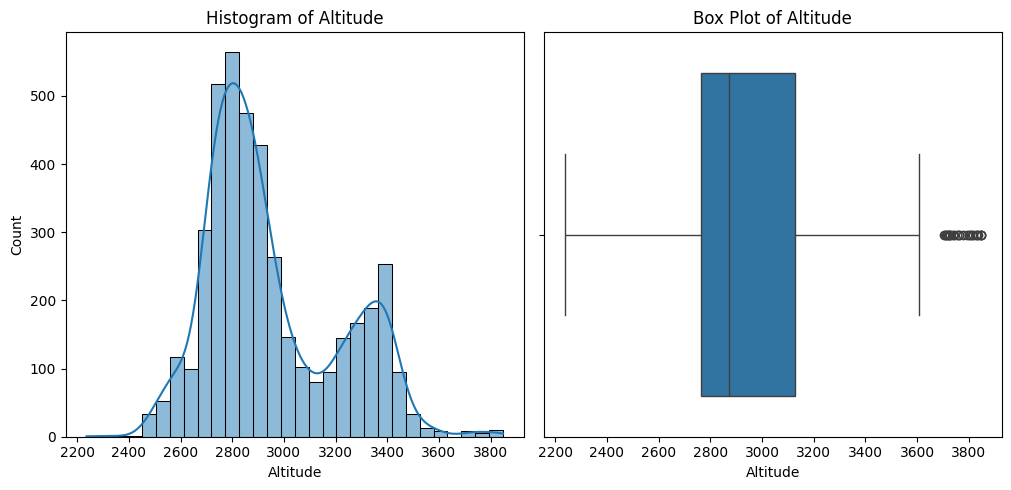

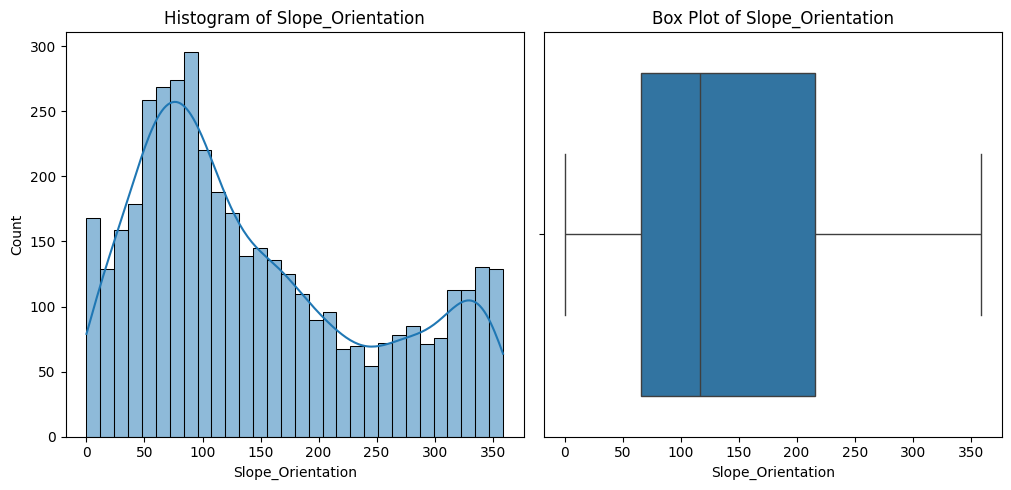

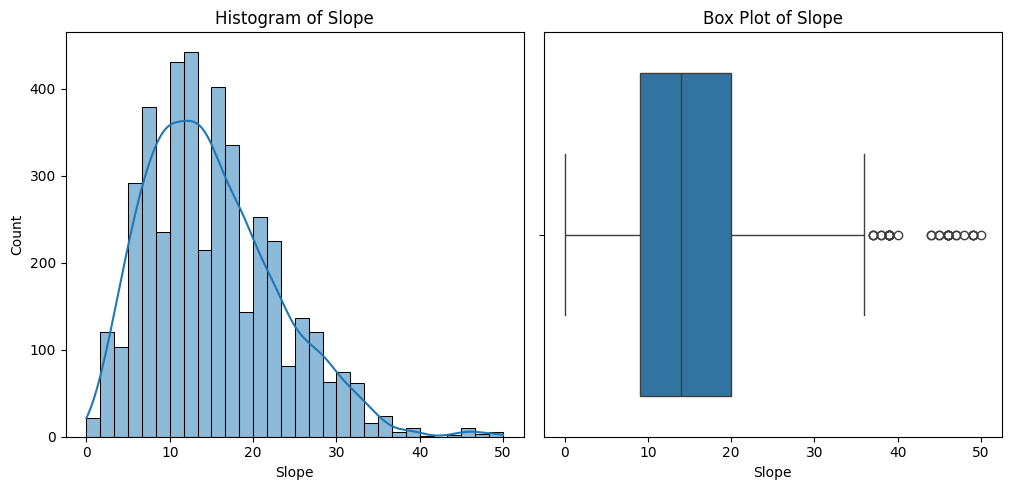

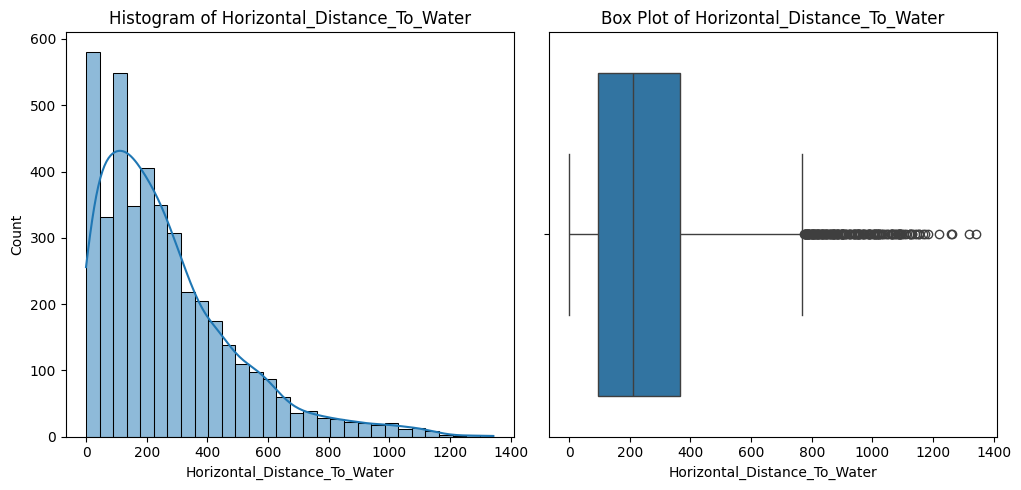

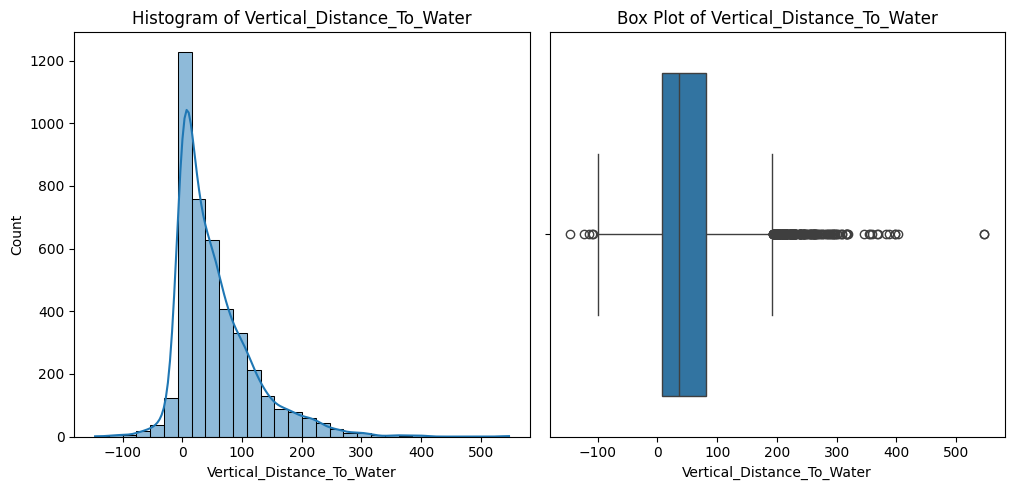

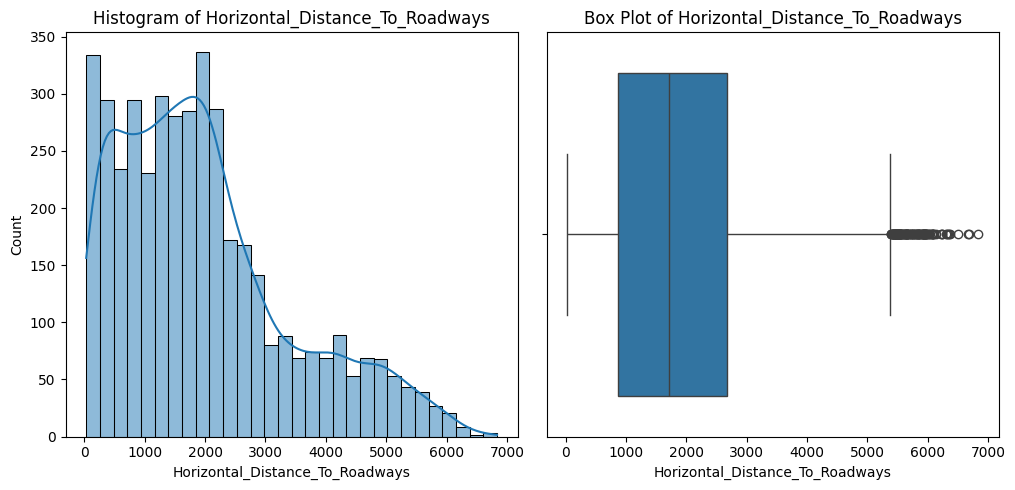

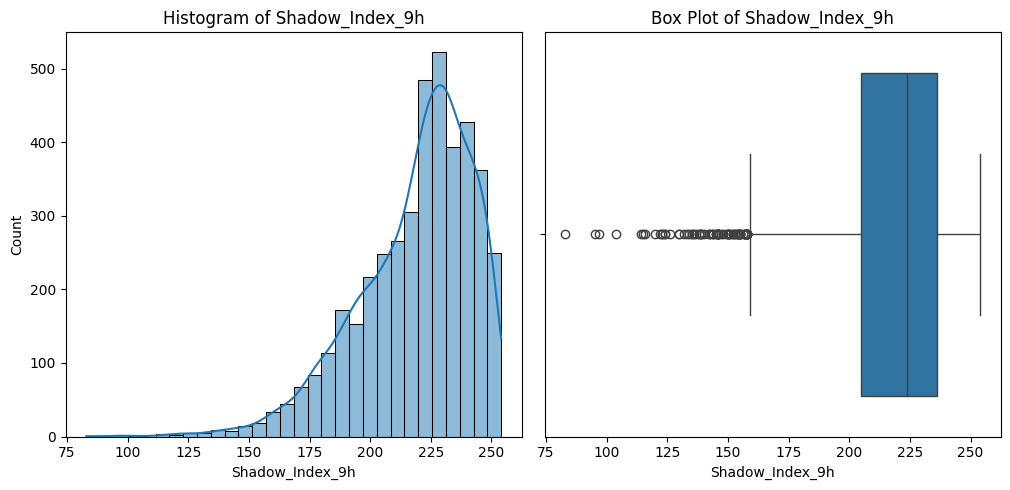

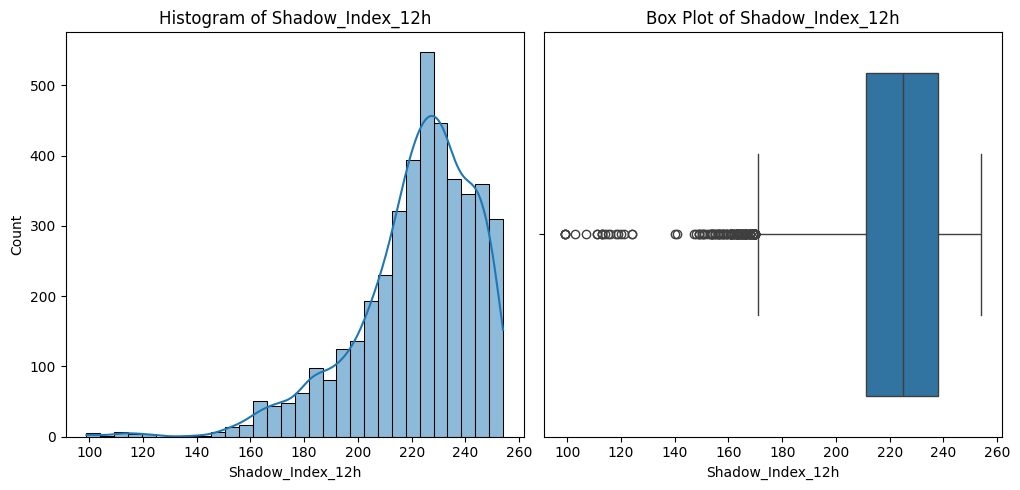

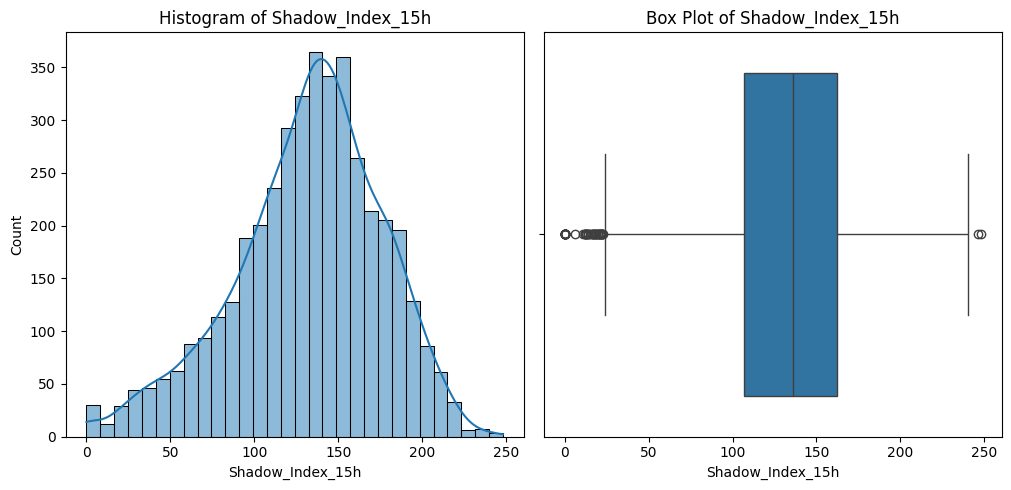

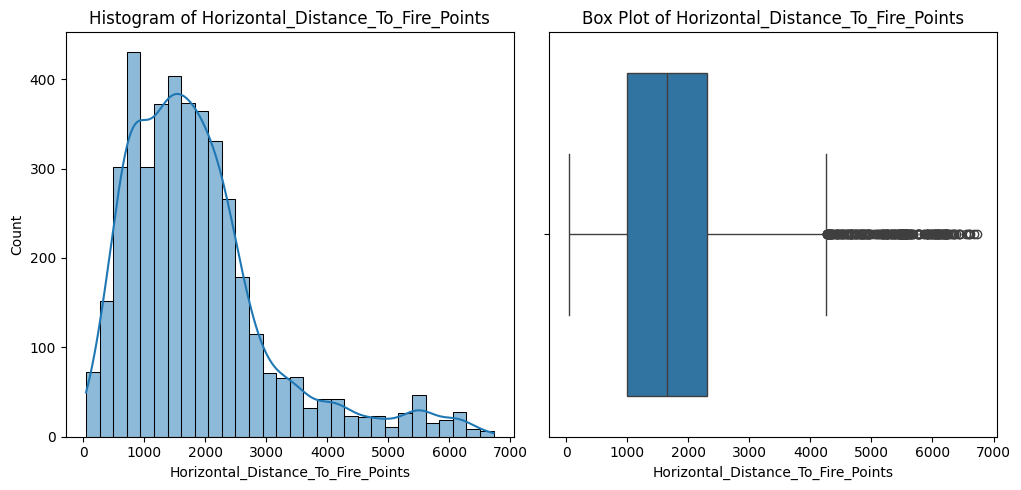

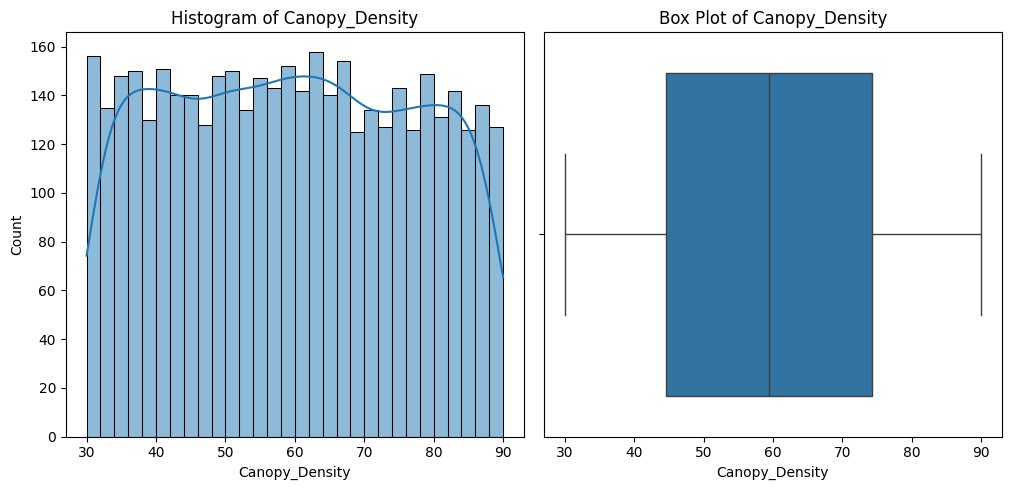

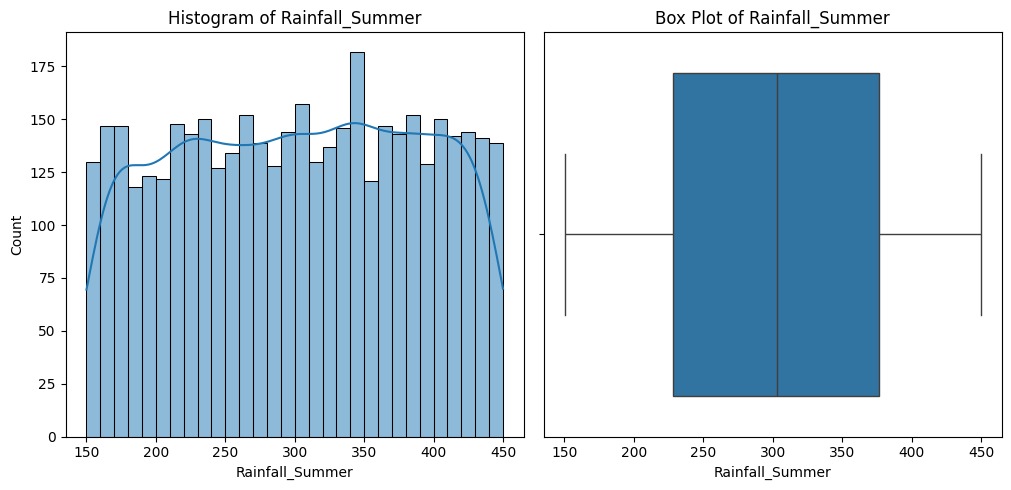

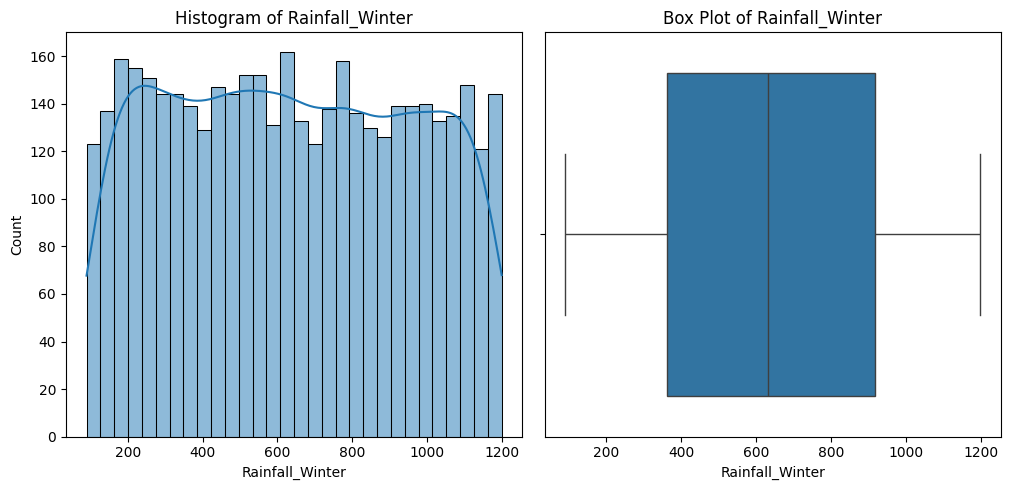

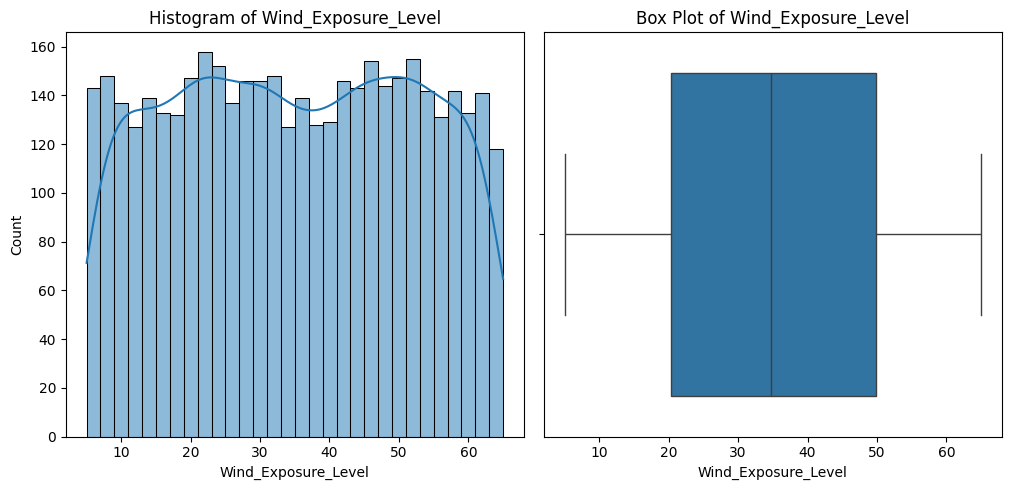

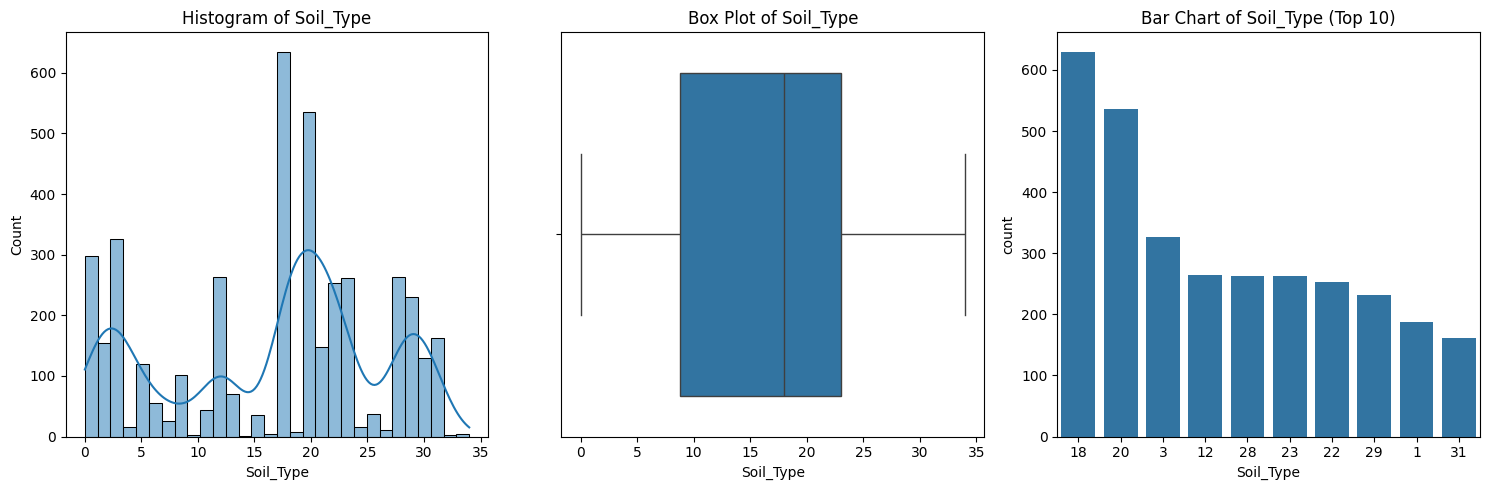

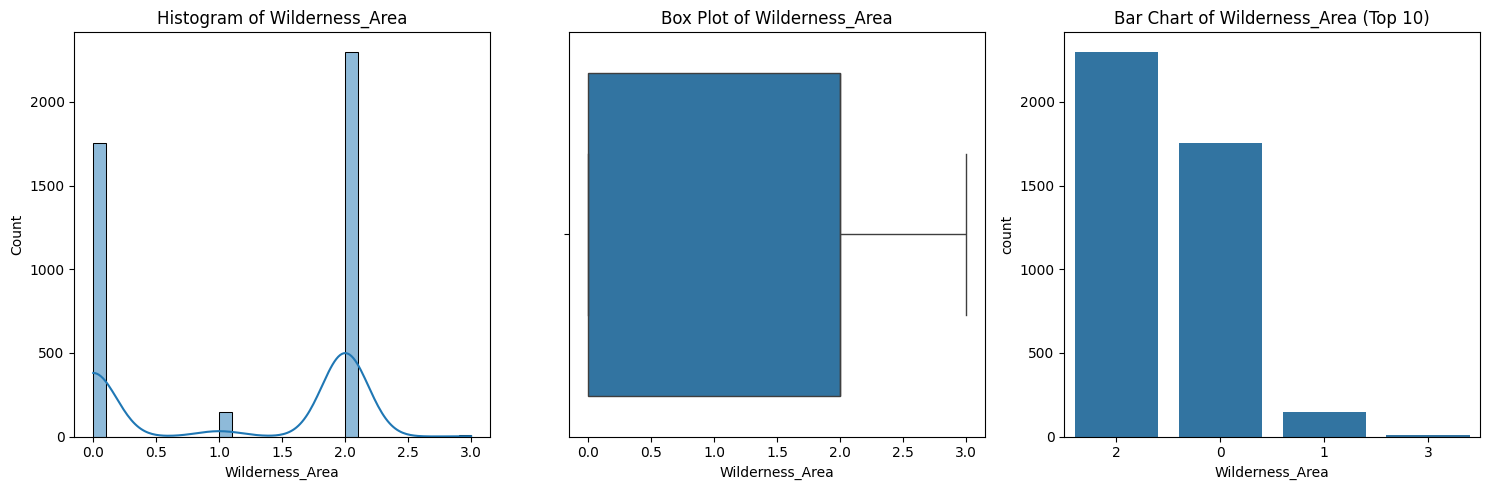

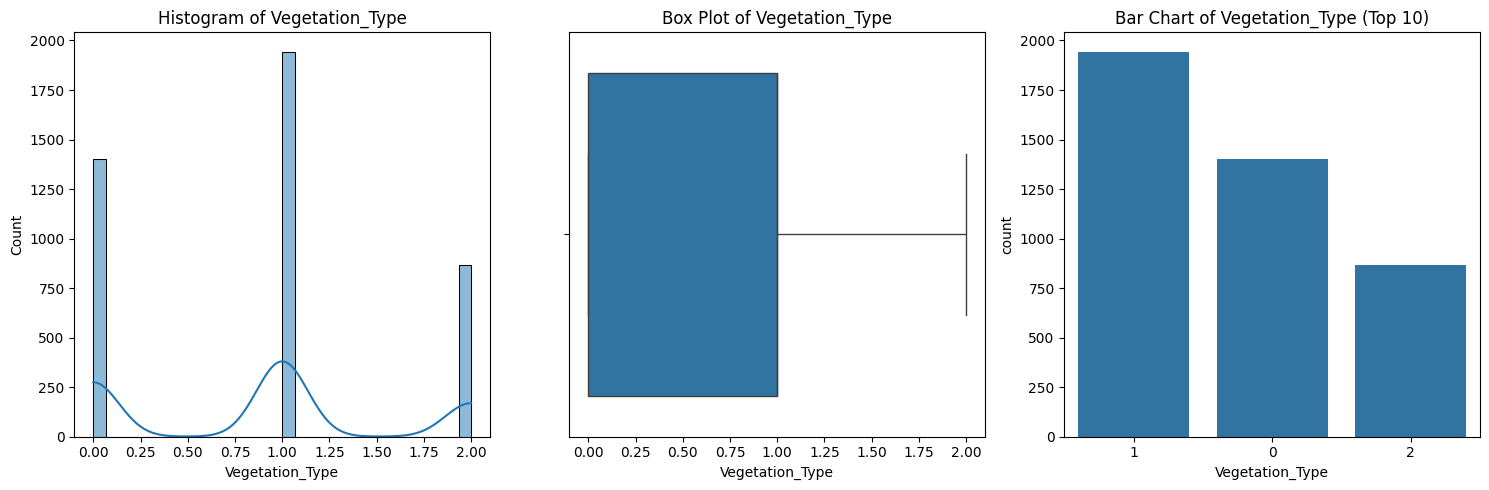

In [40]:
# Passo 2: Univariate Analysis (Distribution of individual features)
def univariate_analysis(data, column_name):
    # with open(f'univariate_analysis/univariate_analysis_{column_name}.txt', 'w') as file:
    #     file.write(f'Univariate Analysis for {column_name}\n')
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    mode_value = data[column_name].mode()[0]
    std_dev_value = data[column_name].std()
    range_value = data[column_name].max() - data[column_name].min()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    # Frequency Distribution (top 10)
    frequency_distribution = data[column_name].value_counts().head(10)
    # file.write('Frequency Distribution (Top 10):\n')
    # file.write(f'{frequency_distribution}\n\n')

    # Central Tendency
    # file.write(f'Mean: {mean_value}\n')
    # file.write(f'Median: {median_value}\n')
    # file.write(f'Mode: {mode_value}\n\n')

    # Variability
    # file.write(f'Standard Deviation: {std_dev_value}\n')
    # file.write(f'Range: {range_value}\n')
    # file.write(f'Variance: {variance_value}\n')
    # file.write(f'IQR: {iqr_value}\n\n')

    # Skewness and Kurtosis
    # file.write(f'Skewness: {skewness_value}\n')
    # file.write(f'Kurtosis: {kurtosis_value}\n\n')

    # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')

    plt.tight_layout()
    # plt.savefig(f'univariate_analysis/univariate_analysis_{column_name}.png')
    plt.show()

variables_to_analyze = [
    dc.ALTITUDE,
    dc.SLOPE_ORIENTATION,
    dc.SLOPE,
    dc.HORIZONTAL_DISTANCE_TO_WATER,
    dc.VERTICAL_DISTANCE_TO_WATER,
    dc.HORIZONTAL_DISTANCE_TO_ROADWAYS,
    dc.SHADOW_INDEX_9,
    dc.SHADOW_INDEX_12,
    dc.SHADOW_INDEX_15,
    dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS,
    dc.CANOPY_DENSITY,
    dc.RAINFALL_SUMMER,
    dc.RAINFALL_WINTER,
    dc.WIND_EXPOSURE_LEVEL,
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
    dc.VEGETATION_TYPE
]

# Realizar a análise univariada para cada variável
for variable in variables_to_analyze:
    univariate_analysis(dt, variable)

# # Conclusões da Análise Univariada
# conclusions = """
# Conclusões da Análise Univariada:

# 1. A variável 'Altitude' apresenta uma média de 2948, com uma ligeira assimetria positiva (skewness = 0.74). Isto sugere que a maior parte dos valores está concentrada em altitudes mais baixas, com alguns valores mais altos a puxar a média para cima.

# 2. A variável 'Slope_Orientation' também tem uma distribuição assimétrica positiva (skewness = 0.62), indicando que a maioria das orientações de encosta estão em valores mais baixos, com alguns valores mais altos a causar uma cauda longa.

# 3. A variável 'Slope' tem uma moda de 9, indicando que esta inclinação é a mais comum. A assimetria positiva (skewness = 0.77) sugere que a maioria dos valores está abaixo da média, com algumas inclinações mais íngremes.

# 4. A 'Horizontal_Distance_To_Water' apresenta um valor de skewness de 1.38, sugerindo uma distribuição altamente assimétrica positiva. Muitos pontos estão próximos de corpos de água, mas há alguns que estão significativamente mais distantes.

# 5. A 'Vertical_Distance_To_Water' mostra uma assimetria ainda mais pronunciada (skewness = 1.64), indicando que a maioria dos pontos está próxima da água verticalmente, mas alguns têm uma grande distância.

# 6. A 'Horizontal_Distance_To_Roadways' tem uma média elevada (1974) e uma assimetria positiva (skewness = 0.90), sugerindo que a maioria dos pontos está relativamente próxima das estradas, com alguns outliers mais distantes.

# 7. As variáveis 'Shadow_Index_9h', 'Shadow_Index_12h' e 'Shadow_Index_15h' apresentam assimetrias negativas, sugerindo que os valores mais elevados são mais comuns. Isto indica que a maioria das áreas tem uma boa cobertura de sombra durante essas horas.

# 8. A variável 'Horizontal_Distance_To_Fire_Points' apresenta uma distribuição altamente assimétrica positiva (skewness = 1.48), sugerindo que a maioria dos pontos está relativamente próxima de pontos de incêndio, mas há alguns pontos significativamente distantes.

# 9. A 'Canopy_Density' tem uma distribuição relativamente simétrica (skewness = 0.03), indicando uma distribuição equilibrada da densidade de copas.

# 10. As variáveis 'Rainfall_Summer' e 'Rainfall_Winter' apresentam kurtosis negativa, indicando que os dados são menos concentrados em torno da média, com caudas mais pesadas.

# 11. A 'Wilderness_Area' é dominada por dois valores (0 e 2), indicando que a maioria dos pontos pertence a essas duas categorias.

# 12. A 'Vegetation_Type' mostra que a categoria 1 é a mais comum, seguida pela categoria 0, indicando uma predominância desses tipos de vegetação.
# """

# with open('univariate_analysis/univariate_analysis_conclusions.txt', 'w') as file:
#     file.write(conclusions)

In [41]:
# Holdout
dtTraining = dt.drop(dc.VEGETATION_TYPE, axis=1)
dtTest = dt[dc.VEGETATION_TYPE]

X_train, X_test, Y_train, Y_test = train_test_split(dtTraining, dtTest, test_size=0.3, random_state=5)

print("---- Holdout Method ----")
holdout_logisticRegression  = myRegression.logisticRegression(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_logisticRegressionOptimized =  myRegression.logisticRegressionOptimized(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_linearDiscriminantAnalysis = myRegression.linearDiscriminantAnalysis(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_linearDiscriminantAnalysisOptimized = myRegression.linearDiscriminantAnalysisOptimized(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_quadraticDiscriminantAnalysis = myRegression.quadraticDiscriminantAnalysis(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_quadraticDiscriminantAnalysisOptimized = myRegression.quadraticDiscriminantAnalysisOptimized(X_train, Y_train, X_test, Y_test)


---- Holdout Method ----
Logistic Regression model accuracy on test data (in %): 80.14240506329115
------------------------------------------------------
Best parameters are:  {'regressor__C': 10}
Best score is:  0.8181865270064173
Logistic Regression model accuracy on test data (in %): 79.90506329113924
------------------------------------------------------
Linear Discriminant Analysis model accuracy on test data (in %): 80.61708860759494
------------------------------------------------------
Best parameters are:  {'regressor__shrinkage': 'auto', 'regressor__solver': 'lsqr'}
Best score is:  0.8076665419700152
Linear Discriminant Analysis model accuracy on test data (in %): 80.37974683544303
------------------------------------------------------
Quadratic Discriminant Analysis model accuracy on test data (in %): 80.7753164556962
------------------------------------------------------
Best parameters are:  {'regressor__reg_param': 0.0, 'regressor__tol': 0.0001}
Best score is:  0.82530632

In [42]:
# Cross Validation (k=5 and k=10)

X = dt.drop(dc.VEGETATION_TYPE, axis=1)
Y = dt[dc.VEGETATION_TYPE]

print("---- Cross Validation Method ----")
crossValidation_logisticRegression5 = myRegression.crossValidation_logisticRegression(X,Y,5)
crossValidation_logisticRegression10 = myRegression.crossValidation_logisticRegression(X,Y,10)
print("------------------------------------------------------")
crossValidation_linearDiscriminantAnalysis5 = myRegression.crossValidation_linearDiscriminantAnalysis(X,Y,5)
crossValidation_linearDiscriminantAnalysis10 = myRegression.crossValidation_linearDiscriminantAnalysis(X,Y,10)
print("------------------------------------------------------")
crossValidation_quadraticDiscriminantAnalysis5 = myRegression.crossValidation_quadraticDiscriminantAnalysis(X,Y,5)
crossValidation_quadraticDiscriminantAnalysis10 = myRegression.crossValidation_quadraticDiscriminantAnalysis(X,Y,10)

---- Cross Validation Method ----
Logistic Regression model accuracy with 5-fold cross-validation (in %): 81.2679520883171
Logistic Regression model accuracy with 10-fold cross-validation (in %): 81.26763179520664
------------------------------------------------------
Linear Discriminant Analysis model accuracy with 5-fold cross-validation (in %): 80.34209347342795
Linear Discriminant Analysis model accuracy with 10-fold cross-validation (in %): 80.38927851763461
------------------------------------------------------
Quadratic Discriminant Analysis model accuracy with 5-fold cross-validation (in %): 82.09910877056548
Quadratic Discriminant Analysis model accuracy with 10-fold cross-validation (in %): 82.33640283234458


In [43]:
# Leave One Out Cross Validation (LOOCV)

print("---- Leave One Out Cross Validation Method ----")
leaveOneOutCrossValidation_logisticRegression = myRegression.leaveOneOutCrossValidation_logisticRegression(X,Y)
print("------------------------------------------------------")
leaveOneOutCrossValidation_linearDiscriminantAnalysis = myRegression.leaveOneOutCrossValidation_linearDiscriminantAnalysis(X,Y)
print("------------------------------------------------------")
leaveOneOutCrossValidation_quadraticDiscriminantAnalysis = myRegression.leaveOneOutCrossValidation_quadraticDiscriminantAnalysis(X,Y)


---- Leave One Out Cross Validation Method ----
Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.19658119658119
------------------------------------------------------
Linear Discriminant Analysis model accuracy with leave-one-out cross-validation (in %): 80.34188034188034
------------------------------------------------------
Quadratic Discriminant Analysis model accuracy with leave-one-out cross-validation (in %): 82.54985754985755


In [44]:
# Bootstrap

print("---- Bootstrap Resampling Method ----")
bootstrap_logisticRegression = myRegression.bootstrap_logisticRegression(X_train,Y_train,100)
print("------------------------------------------------------")
bootstrap_linearDiscriminantAnalysis = myRegression.bootstrap_linearDiscriminantAnalysis(X,Y,100)
print("------------------------------------------------------")
bootstrap_quadraticDiscriminantAnalysis = myRegression.bootstrap_quadraticDiscriminantAnalysis(X,Y,100)

---- Bootstrap Resampling Method ----
Bootstrap Mean Accuracy: 81.54%
------------------------------------------------------
Bootstrap Mean Accuracy: 80.51%
------------------------------------------------------
Bootstrap Mean Accuracy: 83.02%


In [45]:
# Função para comparar os resultados e identificar o melhor método para cada modelo
results = {
    'Logistic Regression': {
        'Holdout': holdout_logisticRegression,
        'Holdout Optimized': holdout_logisticRegressionOptimized,
        'Cross Validation (k=5)': crossValidation_logisticRegression5,
        'Cross Validation (k=10)': crossValidation_logisticRegression10,
        'LOOCV': leaveOneOutCrossValidation_logisticRegression,
        'Bootstrap': bootstrap_logisticRegression
    },
    'Linear Discriminant Analysis': {
        'Holdout': holdout_linearDiscriminantAnalysis,
        'Holdout Optimized': holdout_linearDiscriminantAnalysisOptimized,
        'Cross Validation (k=5)': crossValidation_linearDiscriminantAnalysis5,
        'Cross Validation (k=10)': crossValidation_linearDiscriminantAnalysis10,
        'LOOCV': leaveOneOutCrossValidation_linearDiscriminantAnalysis,
        'Bootstrap': bootstrap_linearDiscriminantAnalysis
    },
    'Quadratic Discriminant Analysis': {
        'Holdout': holdout_quadraticDiscriminantAnalysis,
        'Holdout Optimized': holdout_quadraticDiscriminantAnalysisOptimized,
        'Cross Validation (k=5)': crossValidation_quadraticDiscriminantAnalysis5,
        'Cross Validation (k=10)': crossValidation_quadraticDiscriminantAnalysis10,
        'LOOCV': leaveOneOutCrossValidation_quadraticDiscriminantAnalysis,
        'Bootstrap': bootstrap_quadraticDiscriminantAnalysis
    }
}

best_scores = {}

for model, methods in results.items():
    best_method = max(methods, key=methods.get)
    best_score = methods[best_method]
    best_scores[model] = (best_method, best_score)

for model, (method, score) in best_scores.items():
    print(f"Modelo: {model}")
    print(f"Melhor Método: {method}")
    print(f"Score: {score}")
    print("------------------------------------------------------")

Modelo: Logistic Regression
Melhor Método: Bootstrap
Score: 81.5424016282225
------------------------------------------------------
Modelo: Linear Discriminant Analysis
Melhor Método: Holdout
Score: 80.61708860759494
------------------------------------------------------
Modelo: Quadratic Discriminant Analysis
Melhor Método: Bootstrap
Score: 83.01614434947768
------------------------------------------------------
